In [1]:
import quandl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm # Using .api imports the public access version of statsmodels, which is a library that handles 
# statistical models.
import os
import warnings # This is a library that handles warnings.

warnings.filterwarnings("ignore") # Disable deprecation warnings that could indicate, for instance, a suspended library or 
# feature. These are more relevant to developers and very seldom to analysts.

plt.style.use('fivethirtyeight') # This is a styling option for how your plots will appear. More examples here:
# https://matplotlib.org/3.2.1/tutorials/introductory/customizing.html
# https://matplotlib.org/3.1.0/gallery/style_sheets/fivethirtyeight.html

In [2]:
%matplotlib inline

In [3]:
path = r'/Users/umachidambaram/Aug-2021 Stock Analysis'

In [4]:
df = pd.read_csv(os.path.join(path, '6 Data', 'Prepared Data ', 'df_curr_con.csv'),index_col = False )

In [5]:
df.head()

,Unnamed: 0,Index,Date,Year,Open,Open_con_currency,High,High_con_currency,Low,Low_con_currency,Close,Close_con_currency,Adjust_Close,AdjClose_con_currency,Volume,Country,Currency
0,0,NYA,1965-12-31,1965,528.690002,528.690002,528.690002,528.690002,528.690002,528.690002,528.690002,528.690002,528.690002,528.690002,0.0,United States,USD
1,1,NYA,1966-01-03,1966,527.210022,527.210022,527.210022,527.210022,527.210022,527.210022,527.210022,527.210022,527.210022,527.210022,0.0,United States,USD
2,2,NYA,1966-01-04,1966,527.840027,527.840027,527.840027,527.840027,527.840027,527.840027,527.840027,527.840027,527.840027,527.840027,0.0,United States,USD
3,3,NYA,1966-01-05,1966,531.119995,531.119995,531.119995,531.119995,531.119995,531.119995,531.119995,531.119995,531.119995,531.119995,0.0,United States,USD
4,4,NYA,1966-01-06,1966,532.070007,532.070007,532.070007,532.070007,532.070007,532.070007,532.070007,532.070007,532.070007,532.070007,0.0,United States,USD


In [6]:
# Drop columns with Volume = 0

df.loc[df['Volume'] > 0]

,Unnamed: 0,Index,Date,Year,Open,Open_con_currency,High,High_con_currency,Low,Low_con_currency,Close,Close_con_currency,Adjust_Close,AdjClose_con_currency,Volume,Country,Currency
8814,8814,NYA,2001-01-03,2001,6968.830078,6968.830078,6968.830078,6968.830078,6968.830078,6968.830078,6968.830078,6968.830078,6968.830078,6968.830078,1.880700e+09,United States,USD
8815,8815,NYA,2001-01-04,2001,6894.810059,6894.810059,6894.810059,6894.810059,6894.810059,6894.810059,6894.810059,6894.810059,6894.810059,6894.810059,2.169400e+09,United States,USD
8816,8816,NYA,2001-01-05,2001,6774.060059,6774.060059,6774.060059,6774.060059,6774.060059,6774.060059,6774.060059,6774.060059,6774.060059,6774.060059,1.430800e+09,United States,USD
8817,8817,NYA,2001-01-08,2001,6759.049805,6759.049805,6759.049805,6759.049805,6759.049805,6759.049805,6759.049805,6759.049805,6759.049805,6759.049805,1.115500e+09,United States,USD
8818,8818,NYA,2001-01-09,2001,6754.819824,6754.819824,6754.819824,6754.819824,6754.819824,6754.819824,6754.819824,6754.819824,6754.819824,6754.819824,1.191300e+09,United States,USD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110248,110248,N100,2021-05-27,2021,1241.119995,16.134560,1251.910034,16.274830,1241.119995,16.134560,1247.069946,16.211909,1247.069946,16.211909,3.796964e+08,India,INR
110249,110249,N100,2021-05-28,2021,1249.469971,16.243110,1259.209961,16.369729,1249.030029,16.237390,1256.599976,16.335800,1256.599976,16.335800,1.607734e+08,India,INR
110250,110250,N100,2021-05-31,2021,1256.079956,16.329039,1258.880005,16.365440,1248.140015,16.225820,1248.930054,16.236091,1248.930054,16.236091,9.117370e+07,India,INR
110251,110251,N100,2021-06-01,2021,1254.609985,16.309930,1265.660034,16.453580,1254.609985,16.309930,1258.579956,16.361539,1258.579956,16.361539,1.551799e+08,India,INR


In [7]:
# Import datetime to create Month column

from datetime import date
import datetime as dt

In [8]:
# Create Month column (can be used if need to get a subset of recent stock data.)

df['Month'] = pd.DatetimeIndex(df['Date']).month
df.head()

,Unnamed: 0,Index,Date,Year,Open,Open_con_currency,High,High_con_currency,Low,Low_con_currency,Close,Close_con_currency,Adjust_Close,AdjClose_con_currency,Volume,Country,Currency,Month
0,0,NYA,1965-12-31,1965,528.690002,528.690002,528.690002,528.690002,528.690002,528.690002,528.690002,528.690002,528.690002,528.690002,0.0,United States,USD,12
1,1,NYA,1966-01-03,1966,527.210022,527.210022,527.210022,527.210022,527.210022,527.210022,527.210022,527.210022,527.210022,527.210022,0.0,United States,USD,1
2,2,NYA,1966-01-04,1966,527.840027,527.840027,527.840027,527.840027,527.840027,527.840027,527.840027,527.840027,527.840027,527.840027,0.0,United States,USD,1
3,3,NYA,1966-01-05,1966,531.119995,531.119995,531.119995,531.119995,531.119995,531.119995,531.119995,531.119995,531.119995,531.119995,0.0,United States,USD,1
4,4,NYA,1966-01-06,1966,532.070007,532.070007,532.070007,532.070007,532.070007,532.070007,532.070007,532.070007,532.070007,532.070007,0.0,United States,USD,1


In [9]:
# Select columns starting in year 2001 and later.

start_date ="2001-1-1"
after_start_date = df["Date"] >= start_date
df_time = df.loc[after_start_date]
df_time.head()

,Unnamed: 0,Index,Date,Year,Open,Open_con_currency,High,High_con_currency,Low,Low_con_currency,Close,Close_con_currency,Adjust_Close,AdjClose_con_currency,Volume,Country,Currency,Month
8997,8997,NYA,2001-10-01,2001,5731.490234,5731.490234,5731.490234,5731.490234,5731.490234,5731.490234,5731.490234,5731.490234,5731.490234,5731.490234,1.175600e+09,United States,USD,10
8998,8998,NYA,2001-10-02,2001,5803.069824,5803.069824,5803.069824,5803.069824,5803.069824,5803.069824,5803.069824,5803.069824,5803.069824,5803.069824,1.289800e+09,United States,USD,10
8999,8999,NYA,2001-10-03,2001,5880.580078,5880.580078,5880.580078,5880.580078,5880.580078,5880.580078,5880.580078,5880.580078,5880.580078,5880.580078,1.650600e+09,United States,USD,10
9000,9000,NYA,2001-10-04,2001,5866.089844,5866.089844,5866.089844,5866.089844,5866.089844,5866.089844,5866.089844,5866.089844,5866.089844,5866.089844,1.609100e+09,United States,USD,10
9001,9001,NYA,2001-10-05,2001,5862.080078,5862.080078,5862.080078,5862.080078,5862.080078,5862.080078,5862.080078,5862.080078,5862.080078,5862.080078,1.301700e+09,United States,USD,10


In [10]:
df_time = df_time[["Index","Date","Year","Month","Volume","Open_con_currency","High_con_currency","Low_con_currency", "Close_con_currency","AdjClose_con_currency","Country","Currency"]]

In [11]:
df_time.head()

,Index,Date,Year,Month,Volume,Open_con_currency,High_con_currency,Low_con_currency,Close_con_currency,AdjClose_con_currency,Country,Currency
8997,NYA,2001-10-01,2001,10,1.175600e+09,5731.490234,5731.490234,5731.490234,5731.490234,5731.490234,United States,USD
8998,NYA,2001-10-02,2001,10,1.289800e+09,5803.069824,5803.069824,5803.069824,5803.069824,5803.069824,United States,USD
8999,NYA,2001-10-03,2001,10,1.650600e+09,5880.580078,5880.580078,5880.580078,5880.580078,5880.580078,United States,USD
9000,NYA,2001-10-04,2001,10,1.609100e+09,5866.089844,5866.089844,5866.089844,5866.089844,5866.089844,United States,USD
9001,NYA,2001-10-05,2001,10,1.301700e+09,5862.080078,5862.080078,5862.080078,5862.080078,5862.080078,United States,USD


In [12]:
df_mon_avg = df_time.groupby('Month').mean()
df_mon_avg

,Year,Volume,Open_con_currency,High_con_currency,Low_con_currency,Close_con_currency,AdjClose_con_currency
Month,,,,,,,
1,2011.868219,2.157023e+09,3077.081960,3094.019154,3056.442033,3076.196011,3076.195080
2,2011.873828,2.204358e+09,3140.249886,3157.647394,3120.926832,3140.581324,3140.580475
3,2011.863525,2.283968e+09,3022.474959,3042.700918,3000.535914,3022.479208,3022.478207
4,2011.769765,2.066395e+09,3084.175262,3100.962123,3066.713584,3085.483058,3085.482065
5,2011.867383,2.024390e+09,3114.791696,3131.500153,3095.966242,3114.709392,3114.708415
6,2011.322218,2.003034e+09,2979.149837,2995.836506,2960.257247,2978.180381,2978.179350
7,2011.356566,1.675811e+09,2942.027533,2957.843017,2924.429447,2942.534991,2942.533937
8,2011.315189,1.759050e+09,2967.098959,2983.654099,2948.210138,2966.789855,2966.788792
9,2011.288215,2.068763e+09,3001.751860,3018.376587,2982.602993,3000.609535,3000.608559


In [13]:
df_mon_avg.columns

Index(['Year', 'Volume', 'Open_con_currency', 'High_con_currency',
       'Low_con_currency', 'Close_con_currency', 'AdjClose_con_currency'],
      dtype='object')

In [14]:
df_month = df_mon_avg[["Volume"]]
df_month.head()

,Volume
Month,
1,2.157023e+09
2,2.204358e+09
3,2.283968e+09
4,2.066395e+09
5,2.024390e+09


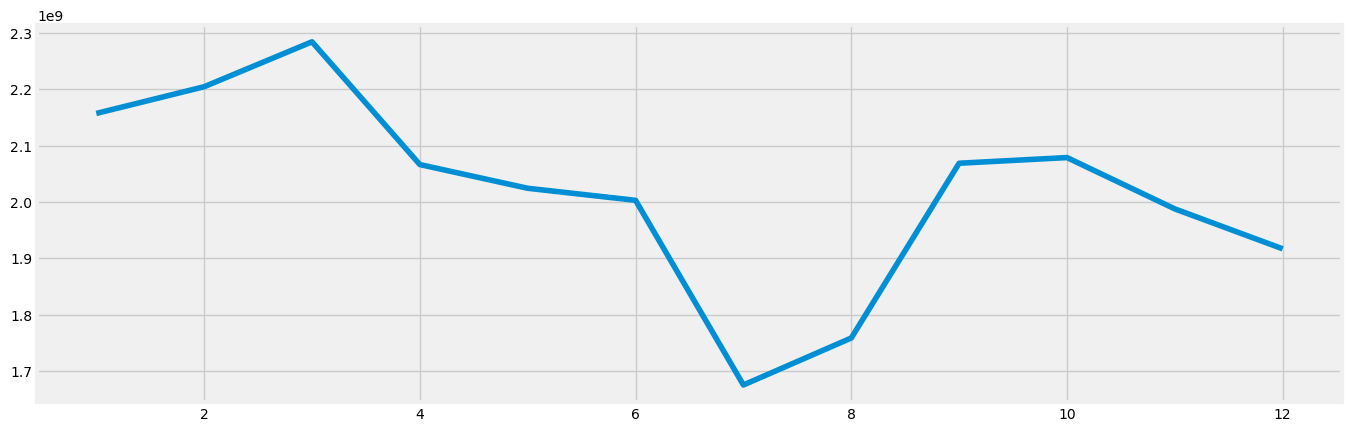

In [15]:
# Plot the data using matplotlib.

plt.figure(figsize=(15,5), dpi=100) # The dpi argument controls the quality of the visualization here. When it's set to 100,
# it will produce lower-than-standard quality, which is useful if, similar to this notebook, you'll have a lot of plots.
# A large number of plots will increase the size of the notebook, which could take more time to load and eat up a lot of RAM!

plt.plot(df_month)

In [16]:
# Volume is highest in March, September through October is next. Lowest in July followed by December.

In [17]:
# Subset for Dickey-Fuller Test 

df_year_avg = df_time.groupby('Year').mean()
df_year_avg

,Month,Volume,Open_con_currency,High_con_currency,Low_con_currency,Close_con_currency,AdjClose_con_currency
Year,,,,,,,
2001,10.965287,1.184044e+09,1987.943503,2001.034079,1977.444909,1990.903667,1990.903121
2002,6.565860,1.294766e+09,1866.295629,1877.256280,1853.385561,1865.214649,1865.214139
2003,6.559316,1.301549e+09,1762.372942,1773.435538,1751.351632,1763.142239,1763.141716
2004,6.589624,1.371566e+09,2109.770086,2119.707175,2099.402400,2109.857790,2109.857217
2005,6.580634,1.411728e+09,2385.796570,2395.668160,2375.653350,2386.201521,2386.201025
2006,6.544724,1.993551e+09,2821.325582,2835.040830,2807.231556,2822.145735,2822.145052
2007,6.626478,2.401202e+09,3313.182567,3333.469144,3290.585293,3313.624609,3313.622603
2008,6.532532,2.763564e+09,2651.904370,2680.856705,2614.230379,2647.160605,2647.159081
2009,6.579387,2.454483e+09,2175.638750,2196.462672,2153.528752,2176.690338,2176.688789


In [18]:
df_year = df_year_avg[["Volume"]]
df_year.head()

,Volume
Year,
2001,1.184044e+09
2002,1.294766e+09
2003,1.301549e+09
2004,1.371566e+09
2005,1.411728e+09


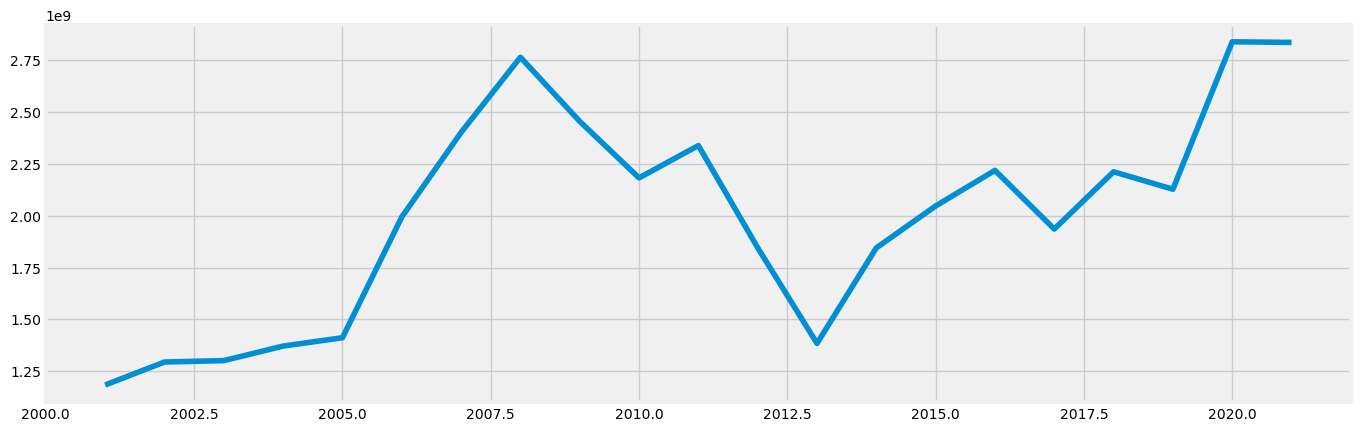

In [19]:
# Plot the data using matplotlib.

plt.figure(figsize=(15,5), dpi=100) # The dpi argument controls the quality of the visualization here. When it's set to 100,
# it will produce lower-than-standard quality, which is useful if, similar to this notebook, you'll have a lot of plots.
# A large number of plots will increase the size of the notebook, which could take more time to load and eat up a lot of RAM!

plt.plot(df_year)

Surge in Volume during 2007 and highest in 2020. Lowest in 2012.

In [20]:
df_time.columns

Index(['Index', 'Date', 'Year', 'Month', 'Volume', 'Open_con_currency',
       'High_con_currency', 'Low_con_currency', 'Close_con_currency',
       'AdjClose_con_currency', 'Country', 'Currency'],
      dtype='object')

In [21]:
df_time1 = df_time[["Date","Volume"]]
df_time1.head()

,Date,Volume
8997,2001-10-01,1.175600e+09
8998,2001-10-02,1.289800e+09
8999,2001-10-03,1.650600e+09
9000,2001-10-04,1.609100e+09
9001,2001-10-05,1.301700e+09


In [22]:
df_time1.columns

Index(['Date', 'Volume'], dtype='object')

In [23]:
df_time2 = df_time[["Date","Year","Month","Volume"]]
df_time2.head()

,Date,Year,Month,Volume
8997,2001-10-01,2001,10,1.175600e+09
8998,2001-10-02,2001,10,1.289800e+09
8999,2001-10-03,2001,10,1.650600e+09
9000,2001-10-04,2001,10,1.609100e+09
9001,2001-10-05,2001,10,1.301700e+09


In [24]:
df_time2['datetime'] = pd.to_datetime(df_time2['Date']) # Create a datetime column from "Date.""
df_time2 = df_time2.set_index('datetime') # Set the datetime as the index of the dataframe.
df_time2.drop(['Date'], axis=1, inplace=True) # Drop the "Date" column.
df_time2.head()

,Year,Month,Volume
datetime,,,
2001-10-01,2001,10,1.175600e+09
2001-10-02,2001,10,1.289800e+09
2001-10-03,2001,10,1.650600e+09
2001-10-04,2001,10,1.609100e+09
2001-10-05,2001,10,1.301700e+09


In [25]:
df_time2 = df_time2.resample('M').sum()

In [26]:
df_time2 = df_time2[["Volume"]]
df_time2.head()

,Volume
datetime,
2001-10-31,3.100560e+11
2001-11-30,3.106901e+11
2001-12-31,2.661025e+11
2002-01-31,2.854055e+11
2002-02-28,2.747206e+11


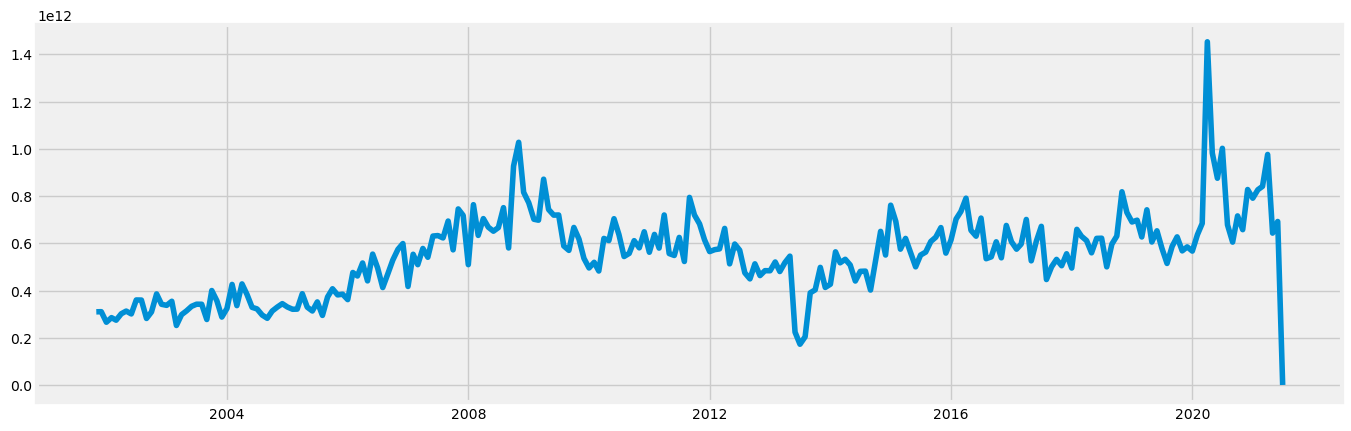

In [27]:
# Plot the new data set

plt.figure(figsize=(15,5), dpi=100)
plt.plot(df_time2)

In [28]:
# Check for missing values (you shouldn't have any)

df_time2.isnull().sum() 

Volume    0
dtype: int64

In [29]:
# Check for duplicates

dups = df_time2.duplicated()
dups.sum()

# No dups!

0

Time Series: Decomposition

In [30]:
# Decompose the time series using an additive model

decomposition = sm.tsa.seasonal_decompose(df_time2, model='additive')

In [31]:
from pylab import rcParams # This will define a fixed size for all special charts.

rcParams['figure.figsize'] = 18, 7

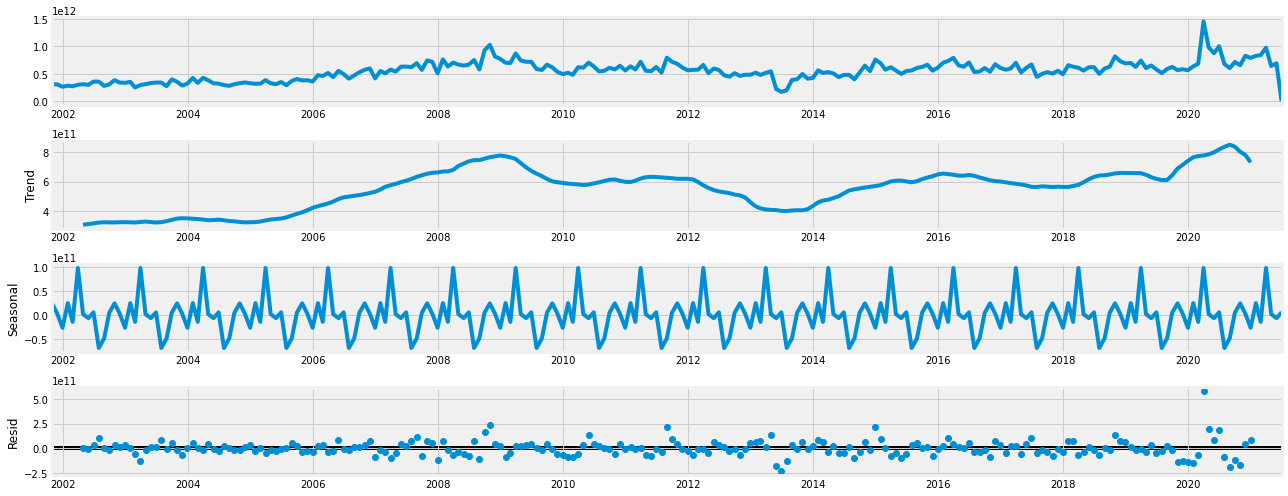

In [32]:
# Plot the separate components

decomposition.plot()
plt.show()

Trend shows there's a surge in Volume during 2009 and 2021 while a dip in 2013. Seasonality shows there is a increase in Volume in March and a dip in July. Residual is more in 2021 and about smooth otherwise.

Testing Stationarity

In [33]:
# The adfuller() function will import from the model from statsmodels for the test; however, running it will only return 
# an array of numbers. This is why you need to also define a function that prints the correct output from that array.

from statsmodels.tsa.stattools import adfuller # Import the adfuller() function

def dickey_fuller(timeseries): # Define the function
    # Perform the Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# Apply the test using the function on the time series
dickey_fuller(df_time2['Volume'])

Dickey-Fuller Stationarity test:
Test Statistic                  -2.307589
p-value                          0.169532
Number of Lags Used             15.000000
Number of Observations Used    221.000000
Critical Value (1%)             -3.460291
Critical Value (5%)             -2.874709
Critical Value (10%)            -2.573789
dtype: float64


p value is larger than 0.05. Test statistic -2.3 is higher than critical values and null hypothesis cannot be rejected. There is a unit root in data and is non-stationary.

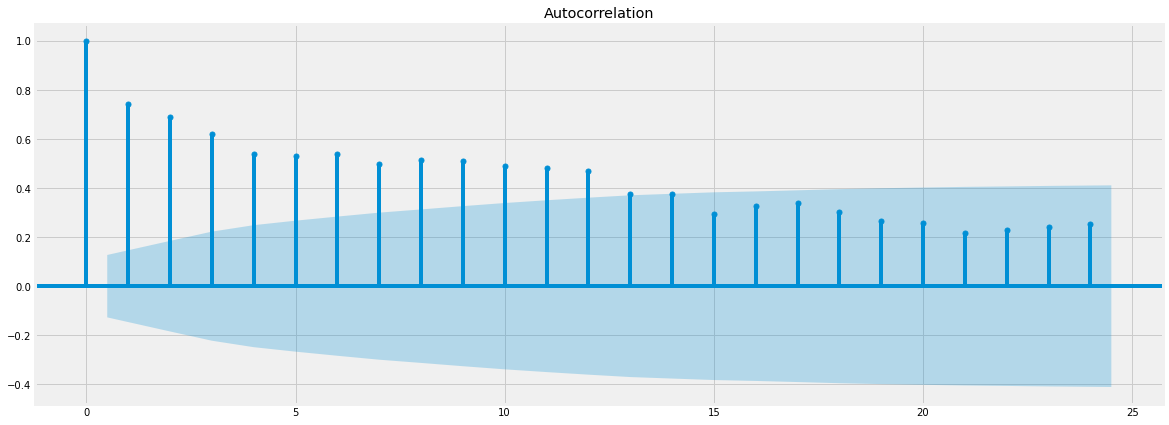

In [34]:
# Check out a plot of autocorrelations

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf # Here, you import the autocorrelation and partial correlation plots

plot_acf(df_time2)
plt.show()

The lags in vertical lines indicate that data is non-stationary.

Stationarizing Yahoo Finance Data

In [36]:
data_diff = df_time2 - df_time2.shift(1) # The df.shift(1) function turns the observation to t-1, making the whole thing t - (t -1)

In [37]:
data_diff.dropna(inplace = True) # Here, you remove the missing values that came about as a result of the differencing. 
# You need to remove these or you won't be able to run the Dickey-Fuller test.

In [38]:
data_diff.head()

,Volume
datetime,
2001-11-30,6.340545e+08
2001-12-31,-4.458759e+10
2002-01-31,1.930297e+10
2002-02-28,-1.068491e+10
2002-03-31,2.713219e+10


In [39]:
data_diff.columns

Index(['Volume'], dtype='object')

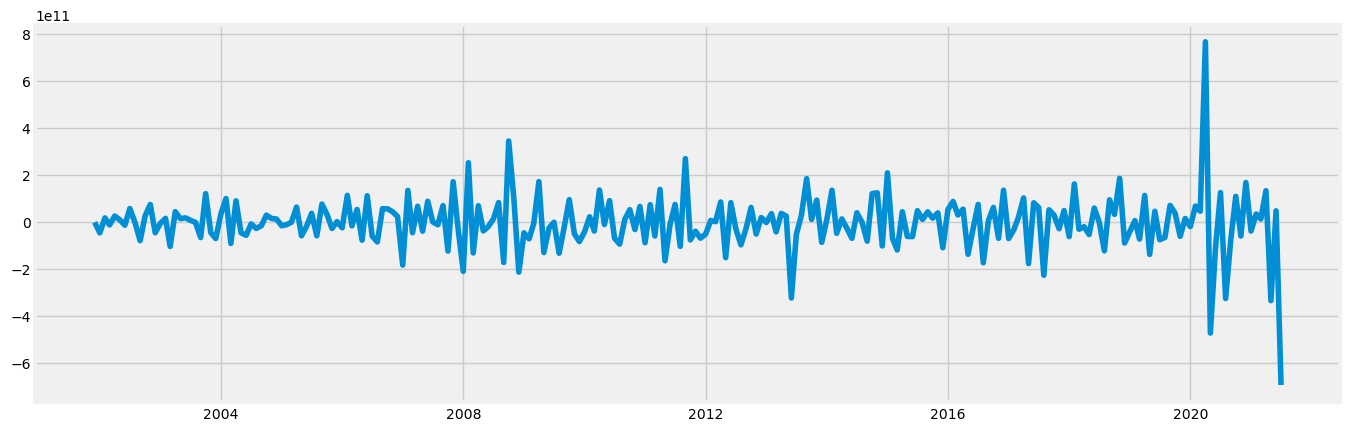

In [40]:
# Check out what the differencing did to the time-series curve

plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_diff)

In [41]:
dickey_fuller(data_diff)

Dickey-Fuller Stationarity test:
Test Statistic                  -4.107703
p-value                          0.000941
Number of Lags Used             15.000000
Number of Observations Used    220.000000
Critical Value (1%)             -3.460428
Critical Value (5%)             -2.874769
Critical Value (10%)            -2.573821
dtype: float64


The test statistic is very small caompared to the critical value. P-value is very less than 0.05. We can reject null hypothesis and the data is stationary.

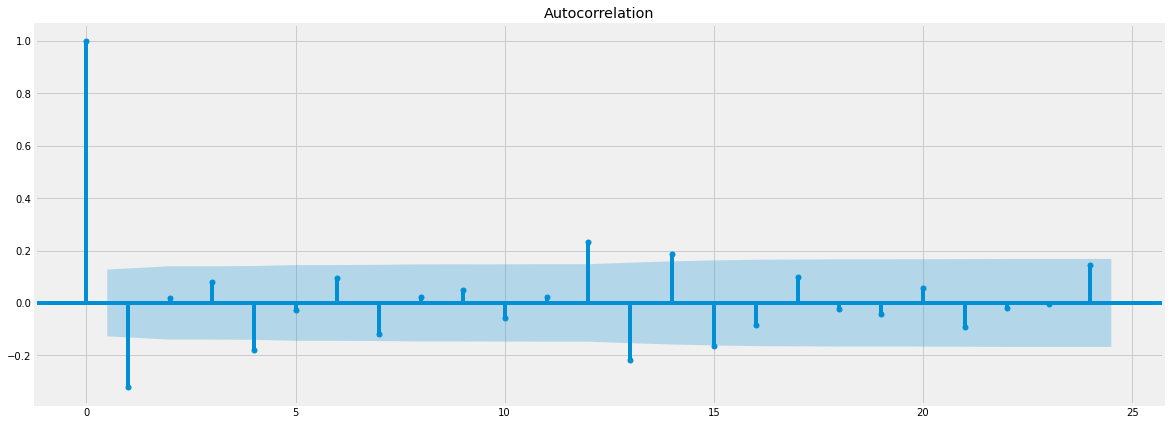

In [42]:
plot_acf(data_diff)
plt.show()

The lags after stationarizing indicate the data is stationary with minimal exception.

In [43]:
# Export data_diff to Prepared Data folder

data_diff.to_csv(os.path.join(path, '6 Data', 'Prepared Data ', 'df_timeseries.csv'))

In [45]:
# Export df to Prepared Data folder

df_time2.to_csv(os.path.join(path, '6 Data', 'Prepared Data ', 'df_datevolume.csv'))